# Gait classification

## Libraries and directory

In [1]:
#import packages, there might be some extras
import time
import os
import platform

import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import keras.utils

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import imageio
from tqdm import tqdm

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.fontsize'] = 'large'



2024-02-12 12:34:26.856530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
if platform.system() == "Darwin":
    root_directory = '/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    root_directory = '/content/drive/MyDrive/Human_Data/Progetto'

print('root directory is ' + root_directory)

root directory is /Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition


## Train/Test Split


In [4]:
# Create a dataframe containing all the files and the labels from the reference file
reference_df = pd.read_csv(root_directory+'/reference_document.csv',
                           header=None, names=['Name_file', 'Path_from_Root', 'Type_of_data', 'Type_of_gait', 'Label'])

reference_df = reference_df.iloc[1:]
reference_df['Label'] = reference_df['Label'].astype(int)

reference_df

,Name_file,Path_from_Root,Type_of_data,Type_of_gait,Label
1,Sbj9_antalgic_T2_S.csv,subject9/antalgic/trial2/,skeleton,antalgic,0
2,Sbj9_antalgic_T2_P.csv,subject9/antalgic/trial2/,pressure,antalgic,0
3,Sbj9_antalgic_T8_S.csv,subject9/antalgic/trial8/,skeleton,antalgic,0
4,Sbj9_antalgic_T8_P.csv,subject9/antalgic/trial8/,pressure,antalgic,0
5,Sbj9_antalgic_T14_P.csv,subject9/antalgic/trial14/,pressure,antalgic,0
...,...,...,...,...,...
2876,Sbj8_normal_T17_S.csv,subject8/normal/trial17/,skeleton,normal,2
2877,Sbj8_normal_T10_P.csv,subject8/normal/trial10/,pressure,normal,2
2878,Sbj8_normal_T10_S.csv,subject8/normal/trial10/,skeleton,normal,2
2879,Sbj8_normal_T6_P.csv,subject8/normal/trial6/,pressure,normal,2


In [5]:
def complete_path(row):
  complete_path = root_directory + '/dataset/' + row['Path_from_Root'] + row['Name_file']
  return complete_path

reference_df['Complete_path'] = reference_df.apply(complete_path, axis=1)
reference_df.set_index('Complete_path', inplace=True)
reference_df = reference_df.drop(columns=['Path_from_Root'])
reference_df

,Name_file,Type_of_data,Type_of_gait,Label
Complete_path,,,,
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject9/antalgic/trial2/Sbj9_antalgic_T2_S.csv,Sbj9_antalgic_T2_S.csv,skeleton,antalgic,0
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject9/antalgic/trial2/Sbj9_antalgic_T2_P.csv,Sbj9_antalgic_T2_P.csv,pressure,antalgic,0
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject9/antalgic/trial8/Sbj9_antalgic_T8_S.csv,Sbj9_antalgic_T8_S.csv,skeleton,antalgic,0
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject9/antalgic/trial8/Sbj9_antalgic_T8_P.csv,Sbj9_antalgic_T8_P.csv,pressure,antalgic,0
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject9/antalgic/trial14/Sbj9_antalgic_T14_P.csv,Sbj9_antalgic_T14_P.csv,pressure,antalgic,0
...,...,...,...,...
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject8/normal/trial17/Sbj8_normal_T17_S.csv,Sbj8_normal_T17_S.csv,skeleton,normal,2
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject8/normal/trial10/Sbj8_normal_T10_P.csv,Sbj8_normal_T10_P.csv,pressure,normal,2
/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject8/normal/trial10/Sbj8_normal_T10_S.csv,Sbj8_normal_T10_S.csv,skeleton,normal,2


In [6]:
# recall
# LABELS = np.array(['antalgic', 'lurching', 'normal', 'steppage', 'stifflegged', 'trendelenburg'])

#split the dataframe into skeleton and pressure, drop the type column

reference_df_s = reference_df[reference_df['Type_of_data']=='skeleton']
reference_df_s = reference_df_s.drop(columns=['Type_of_data', 'Type_of_gait'])

reference_df_p = reference_df[reference_df['Type_of_data']=='pressure']
reference_df_p = reference_df_p.drop(columns=['Type_of_data', 'Type_of_gait'])

# We want to split the data using 11 subjects as training set and 1 subject as test set
# In this way we are sure that train and test are completely dinstinct

# train_test split
'''
train_s = reference_df_s[~reference_df_s['Name_file'].str.startswith('Sbj12')]
val_s = reference_df_s[reference_df_s['Name_file'].str.startswith('Sbj12')]

train_p = reference_df_p[~reference_df_p['Name_file'].str.startswith('Sbj12')]
val_p = reference_df_p[reference_df_p['Name_file'].str.startswith('Sbj12')]


#train_test split
train_s, val_s = train_test_split(reference_df_s, test_size=0.2, stratify=reference_df_s['Label'], random_state=123)
train_p, val_p = train_test_split(reference_df_p, test_size=0.2, stratify=reference_df_p['Label'], random_state=123)


train_s = train_s.drop(columns=['Name_file'])
val_s = val_s.drop(columns=['Name_file'])
train_p = train_p.drop(columns=['Name_file'])
val_p = val_p.drop(columns=['Name_file'])


#frequence counts
print("Training Skeleton")
print(train_s['Label'].value_counts())
print('\n',"Validation Skeleton")
print(val_s['Label'].value_counts())
print('\n',"Train Pressure")
print(train_p['Label'].value_counts())
print('\n',"Validation Pressure")
print(val_p['Label'].value_counts())

reference_df_s
'''

'\ntrain_s = reference_df_s[~reference_df_s[\'Name_file\'].str.startswith(\'Sbj12\')]\nval_s = reference_df_s[reference_df_s[\'Name_file\'].str.startswith(\'Sbj12\')]\n\ntrain_p = reference_df_p[~reference_df_p[\'Name_file\'].str.startswith(\'Sbj12\')]\nval_p = reference_df_p[reference_df_p[\'Name_file\'].str.startswith(\'Sbj12\')]\n\n\n#train_test split\ntrain_s, val_s = train_test_split(reference_df_s, test_size=0.2, stratify=reference_df_s[\'Label\'], random_state=123)\ntrain_p, val_p = train_test_split(reference_df_p, test_size=0.2, stratify=reference_df_p[\'Label\'], random_state=123)\n\n\ntrain_s = train_s.drop(columns=[\'Name_file\'])\nval_s = val_s.drop(columns=[\'Name_file\'])\ntrain_p = train_p.drop(columns=[\'Name_file\'])\nval_p = val_p.drop(columns=[\'Name_file\'])\n\n\n#frequence counts\nprint("Training Skeleton")\nprint(train_s[\'Label\'].value_counts())\nprint(\'\n\',"Validation Skeleton")\nprint(val_s[\'Label\'].value_counts())\nprint(\'\n\',"Train Pressure")\nprint(tr

In [19]:
leave_one_out = None   #index of the subject for validation [1,12], if None then random train/test split

if leave_one_out == None:
    print("Random train/test splitting ", '\n')
    train_s, val_s = train_test_split(reference_df_s, test_size=0.2, stratify=reference_df_s['Label'], random_state=123)
    train_p, val_p = train_test_split(reference_df_p, test_size=0.2, stratify=reference_df_p['Label'], random_state=123)

else:
    print("Leaving out subject ", leave_one_out, '\n')
    string = "Sbj" + str(leave_one_out)
    train_s = reference_df_s[~reference_df_s['Name_file'].str.startswith(string)]
    val_s = reference_df_s[reference_df_s['Name_file'].str.startswith(string)]

    train_p = reference_df_p[~reference_df_p['Name_file'].str.startswith(string)]
    val_p = reference_df_p[reference_df_p['Name_file'].str.startswith(string)]
    
    
train_s = train_s.drop(columns=['Name_file'])
val_s = val_s.drop(columns=['Name_file'])
train_p = train_p.drop(columns=['Name_file'])
val_p = val_p.drop(columns=['Name_file'])


#frequence counts
print("Training Skeleton")
print(train_s['Label'].value_counts())
print('\n',"Validation Skeleton")
print(val_s['Label'].value_counts())
print('\n',"Train Pressure")
print(train_p['Label'].value_counts())
print('\n',"Validation Pressure")
print(val_p['Label'].value_counts())
        
    

Random train/test splitting  

Training Skeleton
5    192
3    192
4    192
0    192
1    192
2    192
Name: Label, dtype: int64

 Validation Skeleton
3    48
2    48
1    48
4    48
5    48
0    48
Name: Label, dtype: int64

 Train Pressure
5    192
3    192
4    192
0    192
1    192
2    192
Name: Label, dtype: int64

 Validation Pressure
3    48
2    48
1    48
4    48
5    48
0    48
Name: Label, dtype: int64


## Skeleton: load and preprocessing

### Defenition of the load function

In [ ]:
def load_data_sk(complete_path, load=True):

  if load:
    complete_path = complete_path.decode()
    print(complete_path)

  df_skelly = pd.read_csv(complete_path, header=None)
  df_skelly = df_skelly.drop([df_skelly.columns[0],df_skelly.columns[-1]], axis=1)

  #convert to np array and reshape
  data = df_skelly.to_numpy().reshape((-1,32,3))

  return data.squeeze()


# Example
sk_data = load_data_sk(train_s.index[1], load=False)

#plot example, select only one frame
plotdata = sk_data[150]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(plotdata[:, 0], plotdata[:, 1], plotdata[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=10, azim=80)
plt.show()

### Definition of the normalization function

In [ ]:
def normalize_data_sk(data):
    # Amplitude estimate for each axes
    norm_factor_x = np.percentile(data[:, :, 0], 95) - np.percentile(data[:, :, 0], 5)
    norm_factor_y = np.percentile(data[:, :, 1], 95) - np.percentile(data[:, :, 1], 5)
    norm_factor_z = np.percentile(data[:, :, 2], 95) - np.percentile(data[:, :, 2], 5)

    data[:, :, 0] = data[:, :, 0] / norm_factor_x
    data[:, :, 1] = data[:, :, 1] / norm_factor_y
    data[:, :, 2] = data[:, :, 2] / norm_factor_z

    return data


# Example
sk_data = load_data_sk(train_s.index[1], load=False)
sk_data_norm = normalize_data_sk(sk_data)


#plot example, select only one frame
plotdata = sk_data[150]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(plotdata[:, 0], plotdata[:, 1], plotdata[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=10, azim=80)
plt.show()

Perche' all'inizio veloce e poi lenta?

In [ ]:
# # check duration of walking samples
# hist = []

# c = 0

# for i in reference_df_s.index:
#     data = load_data_sk(i, reference_df_s)
#     hist.append(data.shape[0])

#     if c % 100 == 0:
#       print('Step:', c)
#     c += 1

# # Create a histogram
# plt.hist(hist, bins=150, edgecolor='black')

# # Add a vertical line for the median
# plt.axvline(np.median(hist), color='red', linestyle='dashed', linewidth=1)
# plt.axvline(np.mean(hist), color='yellow', linestyle='dashed', linewidth=1)

# # Add labels and title
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Histogram')

# # Show the plot
# plt.show()
# print("Median of data (red)",np.median(hist))
# print("Mean of data (yellow)",np.mean(hist))
# print("Standard dev of data", np.std(hist))

### Definition of the crop function

In [ ]:
def random_crop(data, target_size=50, noise_time=20, center_crop=False):

  # remove initial and final frames that we consider as noise
  start = noise_time
  end = data.shape[0] - noise_time

  data = data[start:end, :]

  N = data.shape[0]

  # Random Crop (always centered if center_crop=True)
  if center_crop:
      from_ = int((N / 2) - (target_size / 2))
      # print('Start of the crop: ', from_)
  else:
      from_ = np.random.randint(0, np.floor(N - target_size))
      # print('Start of the crop: ', from_)

  return data[from_:from_ + target_size]


# Example
sk_data = load_data_sk(train_s.index[1], load=False)

sk_data_crop = random_crop(sk_data)
print('Original shape ', sk_data.shape, 'Cropped/Padded shape ', sk_data_crop.shape)

### Unique load_preprocessing and one_hot_encoding function

In [ ]:
def load_prep_sk(complete_path):
    data = load_data_sk(complete_path, load=True)
    data = normalize_data_sk(data)

    # riportati i dati in un vettore pronti per il RNN
    data = data.reshape(data.shape[0], -1)

    return data.astype(np.float32)

In [ ]:
'''
def one_hot(indice):

  matrix = np.zeros((len(indice), 6))
  matrix[np.arange(len(indice)), indice] = 1

  return matrix
'''

## Skeleton dataset

### Defenition of the function to create the dataset

In [ ]:
def create_dataset_sk(table, cache_file, shuffle, batch_size, target_size=50, noise_time=20, center_crop=False):

  # shape
  input_size = (target_size, 96)

  # Convert dataframe to lists
  file_names = list(table.index)
  labels = table['Label']

  # Create a Dataset object
  dataset = tf.data.Dataset.from_tensor_slices((file_names, labels))
  # dataset = tf.data.Dataset.from_tensor_slices((file_names, labels))

  # Map the load_and_preprocess_data function
  py_func = lambda path, label: (tf.numpy_function(load_prep_sk, [path], tf.float32), label)
  dataset = dataset.map(py_func, num_parallel_calls=os.cpu_count())

  # Cache dataset
  if cache_file:
      dataset = dataset.cache(cache_file)

  # # Shuffle
  # if shuffle:
  #     dataset = dataset.shuffle(len(file_names))

  # Repeat the dataset indefinitely
  dataset = dataset.repeat()

  # Map the crop function
  py_func = lambda data, label: (tf.ensure_shape(tf.numpy_function(random_crop, [data, target_size, noise_time, center_crop], tf.float32),
                                              input_size), label)
  dataset = dataset.map(py_func, num_parallel_calls=os.cpu_count())

  # # # Correct input shape for the network
  # dataset = dataset.map(lambda data, label: (tf.expand_dims(data, 2), label))

  # Batch
  dataset = dataset.batch(batch_size=batch_size)

  # Prefetch
  dataset = dataset.prefetch(buffer_size=1)

  return dataset


### Dataset inizialization

In [ ]:
batch_s = 20

dataset_train_s = create_dataset_sk(table = train_s,
                                    cache_file = 'train_s_cache_int_label',
                                    shuffle = True,
                                    batch_size = batch_s,
                                    target_size = 50,
                                    noise_time = 20,
                                    center_crop = False)

dataset_val_s = create_dataset_sk(table = val_s,
                                    cache_file = 'val_s_cache',
                                    shuffle = False,
                                    batch_size = batch_s,
                                    target_size = 50,
                                    noise_time = 20,
                                    center_crop = False)

train_steps_s = int(np.ceil(len(train_s)/batch_s))
val_steps_s = int(np.ceil(len(val_s)/batch_s))

In [ ]:
# first_element_dataset_k = dataset_train_s.take(1)
# first_element_dataset_k

In [ ]:
# for d, l in first_element_dataset_k:
#   print(d.numpy().shape, l)

## Pressure: load and preprocessing

### Defenition of the load function

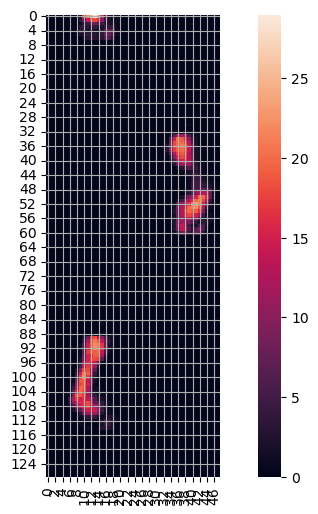

In [20]:
def load_data_ps(complete_path, load=True):

  if load:
    complete_path = complete_path.decode()

  pressure_data = pd.read_csv(complete_path, header=None).to_numpy()

  return pressure_data.squeeze()


# Example
ps_data = load_data_ps(train_p.index[0], load=False)

sns.heatmap(ps_data, square= True)
plt.show()

### Definition of the normalization function

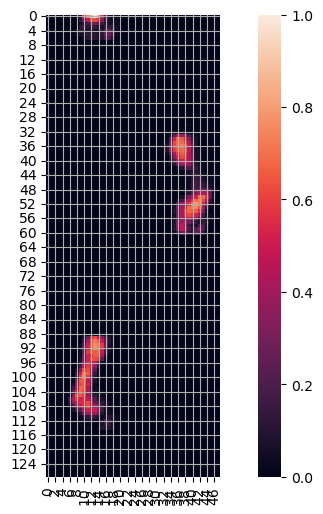

In [21]:
def normalize_data_ps(data):
    max_data = np.max(data)
    data = data / max_data
    return data

# Example
ps_data = load_data_ps(train_p.index[0], load=False)
ps_data_norm = normalize_data_ps(ps_data)

sns.heatmap(ps_data_norm, square= True)
plt.show()

### Definition of the centering function

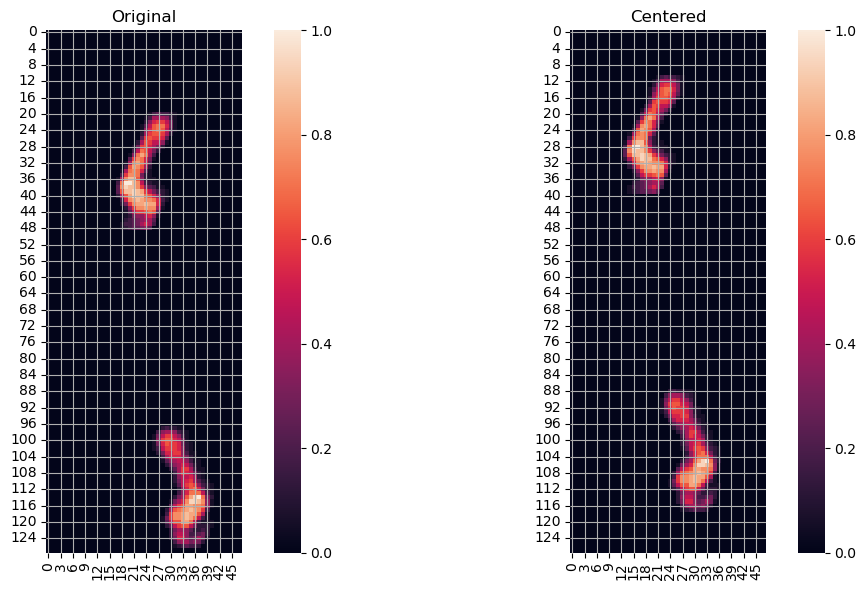

In [22]:
def barycenter(data):
  # Compute the weighted average (barycenter) along each dimension
  y_barycenter = np.average(np.arange(data.shape[0]), weights=np.sum(data, axis=1))
  x_barycenter = np.average(np.arange(data.shape[1]), weights=np.sum(data, axis=0))

  # print("Barycenter coordinates (x,y) = ",x_barycenter,y_barycenter)
  # print("Center image (x,y) = ", data.shape[1]/2, data.shape[0]/2)

  # Compute the distances between each point and the barycenter
  shift_x = -(x_barycenter - data.shape[1]/2)
  shift_y = -(y_barycenter - data.shape[0]/2)

  # Shift the foot pressure matrix to be centered on the barycenter
  shifted_matrix = np.roll(data, int(shift_x), axis=1)
  shifted_matrix = np.roll(shifted_matrix, int(shift_y), axis=0)

  # y_barycenter_after = np.average(np.arange(shifted_matrix.shape[0]), weights=np.sum(shifted_matrix, axis=1))
  # x_barycenter_after = np.average(np.arange(shifted_matrix.shape[1]), weights=np.sum(shifted_matrix, axis=0))
  # print("Barycenter coordinates (x,y) afetr= ", x_barycenter_after, y_barycenter_after, '\n')

  return shifted_matrix

# Example
for i in [253]:
  ps_data = load_data_ps(train_p.index[i], load=False)
  ps_data_norm = normalize_data_ps(ps_data)
  cen_ps_data_norm = barycenter(ps_data_norm)

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Plot the first heatmap
  sns.heatmap(ps_data_norm, square=True, ax=axes[0])
  axes[0].set_title('Original')

  # Plot the second heatmap
  sns.heatmap(cen_ps_data_norm, square=True,ax=axes[1])
  axes[1].set_title('Centered')

  # Adjust layout
  plt.tight_layout()

  # Show the plot
  plt.show()

### Unique load_preprocessing and one_hot_encoding function

In [23]:
def load_prep_ps(complete_path):
    data = load_data_ps(complete_path, load=True)
    data = normalize_data_ps(data)
    data = barycenter(data)

    return data.astype(np.float32)

In [ ]:
'''def one_hot(indice):

  matrix = np.zeros((len(indice), 6))
  matrix[np.arange(len(indice)), indice] = 1

  return matrix'''

## Pressure dataset

### Definition of the function to create the dataset

In [59]:
def create_dataset_ps(table, cache_file, shuffle, batch_size, ):

  # Convert dataframe to lists
  file_names = list(table.index)
  labels = table['Label']

  # Create a Dataset object
  dataset = tf.data.Dataset.from_tensor_slices((file_names, labels))

  # Map the load_and_preprocess_data function
  py_func = lambda path, label: (tf.numpy_function(load_prep_ps, [path], tf.float32), label)
  dataset = dataset.map(py_func, num_parallel_calls=os.cpu_count())

  # Cache dataset
  if cache_file:
      dataset = dataset.cache(cache_file)

  # Shuffle
  if shuffle:
      dataset = dataset.shuffle(len(table))

  # Repeat the dataset indefinitely
  dataset = dataset.repeat()

  # Correct input shape for the network
  dataset = dataset.map(lambda data, label: (tf.expand_dims(data, 2), label))

  # Batch
  dataset = dataset.batch(batch_size=batch_size)

  # Prefetch
  dataset = dataset.prefetch(buffer_size=1)

  return dataset


### Dataset inizialization

In [60]:
batch_p = 30

dataset_train_p = create_dataset_ps(table = train_p,
                                    cache_file = 'train_p_cache',
                                    shuffle = True,
                                    batch_size = batch_p)

dataset_val_p = create_dataset_ps(table = val_p,
                                    cache_file = 'val_p_cache',
                                    shuffle = False,
                                    batch_size = batch_p)

train_steps_p = int(np.ceil(len(train_p)/batch_p))
val_steps_p = int(np.ceil(len(val_p)/batch_p))

In [61]:
first_element_dataset_p = dataset_train_p.take(1)
first_element_dataset_p

<TakeDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [62]:
for d, l in first_element_dataset_p:
  print(d.numpy().shape, l.numpy().shape)

(30, 128, 48, 1) (30,)


## RNN

In [56]:
def MyModel_RNN(time_length, n_features):

  X_input = tf.keras.Input((time_length, 96))

  # Linear_part
  x = tf.keras.layers.Dense(units=n_features, activation='relu', input_shape=(time_length, n_features))(X_input)

  # RNN part
  # h(t) = tanh(W_hx * x(t) + W_hh * h(t-1) + bias)
  x = tf.keras.layers.GRU(125, return_sequences=True, activation='tanh', name='I_GRU')(x)

  x = tf.keras.layers.GRU(125, return_sequences=True, activation='tanh', name='II_GRU')(x)
  x = tf.keras.layers.GRU(125, return_sequences=True, activation='tanh', name='III_GRU')(x)
  x = tf.keras.layers.GRU(125, return_sequences=False, activation='tanh', name='IV_GRU')(x)

  # Flatten_output
  x = tf.keras.layers.Flatten()(x)                                                                       # serve davvero il flatten?

  # Linear part
  x = tf.keras.layers.Dense(64, activation='relu', name='I_layer')(x)
  x = tf.keras.layers.Dense(32, activation='relu', name='II_layer')(x)
  x = tf.keras.layers.Dense(16, activation='relu', name='III_layer')(x)

  # Last layer
  RNN_outputs = tf.keras.layers.Dense(6, activation='softmax', name='Output_layer')(x)

  # Create model
  model = tf.keras.Model(inputs = X_input, outputs = RNN_outputs, name='RNN_model')

  return model


RNN_classifier_model = MyModel_RNN(50, 96)
RNN_classifier_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print(RNN_classifier_model.summary(), '\n')

Model: "RNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 50, 96)]          0         
                                                                 
 dense (Dense)               (None, 50, 96)            9312      
                                                                 
 I_GRU (GRU)                 (None, 50, 125)           83625     
                                                                 
 II_GRU (GRU)                (None, 50, 125)           94500     
                                                                 
 III_GRU (GRU)               (None, 50, 125)           94500     
                                                                 
 IV_GRU (GRU)                (None, 125)               94500     
                                                                 
 flatten_9 (Flatten)         (None, 125)               0 

In [ ]:
# Train the model
num_epochs = 30

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=5)

# Fit the model
history = RNN_classifier_model.fit(dataset_train_s,
                                   epochs=num_epochs,
                                   steps_per_epoch=train_steps_s,
                                   validation_data=dataset_val_s,
                                   validation_steps=val_steps,
                                   callbacks=[early_stop_callback])


RNN_classifier_model.save('RNN/RNN_model')

## CNN

In [63]:
def MyModel_CNN(side_1, side_2, side_3):

  CNN_inputs = tf.keras.Input(shape=(side_1, side_2, side_3))

  x = tf.keras.layers.Conv2D(filters = 32,
                            kernel_size = 3,
                            strides = 1,
                            padding = 'valid',
                            activation = 'relu',
                            name='I_Conv2D')(CNN_inputs)
  x = tf.keras.layers.MaxPool2D(pool_size = 2)(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2D(32, 3, 1, padding='valid', activation = 'relu', name='II_Conv2D')(x)
  x = tf.keras.layers.MaxPool2D(2)(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2D(64, 3, 1, padding='valid', activation = 'relu', name='III_Conv2D')(x)
  x = tf.keras.layers.MaxPool2D(2)(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(64, activation='relu', name='I_layer')(x)
  x = tf.keras.layers.Dense(32, activation='relu', name='II_layer')(x)
  x = tf.keras.layers.Dense(16, activation='relu', name='III_layer')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
                                                                                        
  CNN_outputs = tf.keras.layers.Dense(6, activation='softmax', name='Output_layer')(x)

  # Create model
  model = tf.keras.Model(inputs=CNN_inputs, outputs=CNN_outputs)

  return model


CNN_classifier_model = MyModel_CNN(128, 48, 1)
CNN_classifier_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print(CNN_classifier_model.summary(), '\n')

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 128, 48, 1)]      0         
                                                                 
 I_Conv2D (Conv2D)           (None, 126, 46, 32)       320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 63, 23, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 63, 23, 32)       128       
 chNormalization)                                                
                                                                 
 II_Conv2D (Conv2D)          (None, 61, 21, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 30, 10, 32)       0   

In [ ]:
# Train the model
num_epochs = 30

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                       patience=10)

# Fit the model
history = CNN_classifier_model.fit(dataset_train_p,
                                   epochs=num_epochs,
                                   steps_per_epoch=train_steps_p,
                                   validation_data=dataset_val_p,
                                   validation_steps=val_steps_p,
                                   callbacks=[early_stop_callback])


CNN_classifier_model.save('CNN/CNN_model')

Epoch 1/30
39/39 [==============================] - 2s 52ms/step - loss: 0.1966 - accuracy: 0.9291 - val_loss: 5.2841 - val_accuracy: 0.1733
Epoch 2/30
39/39 [==============================] - 2s 55ms/step - loss: 0.1922 - accuracy: 0.9265 - val_loss: 4.4614 - val_accuracy: 0.1933
Epoch 3/30
39/39 [==============================] - 2s 52ms/step - loss: 0.1775 - accuracy: 0.9308 - val_loss: 5.1048 - val_accuracy: 0.1933
Epoch 4/30
39/39 [==============================] - 2s 50ms/step - loss: 0.1769 - accuracy: 0.9359 - val_loss: 4.9673 - val_accuracy: 0.1833
Epoch 5/30
39/39 [==============================] - 2s 48ms/step - loss: 0.2355 - accuracy: 0.9239 - val_loss: 3.7074 - val_accuracy: 0.2267
Epoch 6/30
39/39 [==============================] - 2s 49ms/step - loss: 0.1992 - accuracy: 0.9368 - val_loss: 2.3602 - val_accuracy: 0.4333
Epoch 7/30
39/39 [==============================] - 2s 49ms/step - loss: 0.1424 - accuracy: 0.9444 - val_loss: 2.6349 - val_accuracy: 0.3833
Epoch 8/30
39